In [6]:


from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log
log.ger.setLevel(log.log.INFO)
import time

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import numpy as np

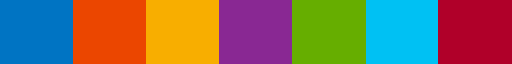

In [8]:

import numpy as np
from matplotlib import cm

from sklearn.linear_model import LinearRegression, BayesianRidge
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cols = [
    #'#ffff33',
    '#0074c3',
    '#eb4600',
    '#f8ae00',
    '#892893',
    '#66ae00',
    '#00c1f3',
    '#b00029',
]

my_cmap = ListedColormap(cols)

my_cmap

In [9]:
plot_path = Path('Plots')

In [10]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [11]:
plot_path.mkdir(exist_ok=True, parents=True)

## Load observations: 

In [12]:
import pandas as pd

In [13]:
from bs_fdbck.constants import measurements_path

In [14]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:120: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:123: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


N50     1414.990567
N80      818.930198
N100     704.766711
N150     342.910596
N200     177.021711
N250      86.669283
N300      34.127077
JA         1.000000
dtype: float64


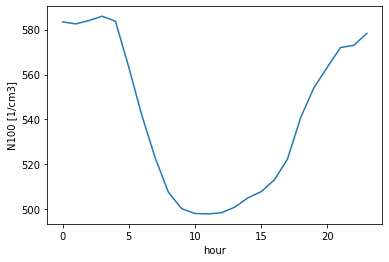

In [15]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_with_Nx, get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()

### Yearly medians:


In [16]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [17]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

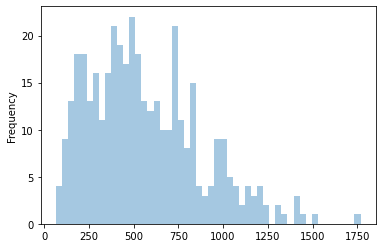

In [18]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

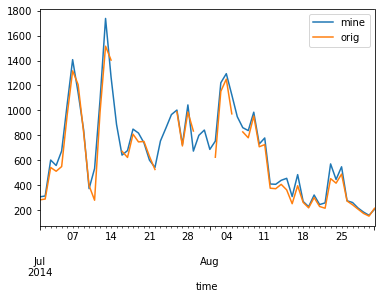

In [19]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)# right_on='date', left_on='time')
(1.2**(-1)*df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()

## load models:

## Read in model data. 

## Settings:

In [20]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [21]:
from_t = '2011-01-01'
to_t = '2015-01-01'

## Cases:

In [22]:
cases_inc_Y = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_full']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl
cases_inc_Y = ['OsloAero_intBVOC_f19_f19_mg17_incY_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [23]:
case_mod = cases_orig[0]

In [24]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-03-25 15:52:02,244 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


2022-03-25 15:52:02,244 useful_scit  INFO     TIMES:****: 2011-01-01 2015-01-01


In [25]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [26]:
for case_name in cases_inc_Y:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [27]:
dic_ds = dict()
for ca in cases_orig + cases_inc_Y:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/SOA_LV_OsloAero_int

2022-03-25 15:52:03,280 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/N100_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD500_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/DOD440_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/ACTREL_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/H2SO4_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocate

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_N_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_AX_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_NI_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_A_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_AI_OsloAero_intBVOC_f19_f19_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19/BC_AC_OsloAero_intBVOC_

2022-03-25 15:52:09,996 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2S

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/N100_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_incY_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_incY_full_2011-01-01_20

In [28]:
dic_ds[cases_inc_Y[0]]

<xarray.Dataset>
Dimensions:   (time: 35065, station: 24, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2011-01-01 ... 2015-01-01
  * station   (station) object 'ASP' 'BIR' 'PAL' 'PLA' ... 'JFJ' 'BEO' 'CMN'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (station, time) float32 dask.array<chunksize=(24, 35065), meta=np.ndarray>
    BC_A      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AC     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AI     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AX     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_N      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    ...        ...
    SOA_LV    (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SOA_NA    (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A1     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A2     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A3     (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    T         (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>

In [29]:
dic_ds[cases_orig[0]]

<xarray.Dataset>
Dimensions:     (time: 35065, station: 24, lev: 32)
Coordinates: (12/51)
    lat_58.80n  float64 59.68
    lon_17.38e  float64 17.5
    lat_58.38n  float64 57.79
    lon_8.25e   float64 7.5
    lat_67.97n  float64 67.26
    lon_24.12e  float64 25.0
    ...          ...
    lon_23.58e  float64 22.5
    lat_44.18n  float64 44.53
    lon_10.68e  float64 10.0
  * time        (time) datetime64[ns] 2011-01-01 ... 2015-01-01
  * station     (station) object 'ASP' 'BIR' 'PAL' 'PLA' ... 'JFJ' 'BEO' 'CMN'
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL      (station, time) float32 dask.array<chunksize=(24, 35065), meta=np.ndarray>
    BC_A        (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AC       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AI       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_AX       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    BC_N        (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    ...          ...
    SOA_LV      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SOA_NA      (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A1       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A2       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    SS_A3       (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>
    T           (station, time, lev) float32 dask.array<chunksize=(24, 35065, 32), meta=np.ndarray>

In [30]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [31]:

def get_dic_df_mod(model_lev_i=-1):
    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        ds_sel = ds.sel(station='SMR').isel( lev=model_lev_i)
        rho = pressure*100/(R*ds_sel['T'])
    
        ds_sel['rho'] = rho.load()
        df = ds_sel.to_dataframe()
        ls_so4 = [c for c in df.columns if 'SO4_' in c]#['SO4_NA']

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel[s].attrs['units']!=un:
                ds_sel[s] = ds_sel[s]*ds_sel['rho']*kg2ug
                ds_sel[s].attrs['units']=un

        df = ds_sel.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
    
    
        df_daily = df.resample('D').median()

        months = (df_daily.index.month==7 )|(df_daily.index.month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        df_s.index = df_s.index.rename('date')
        df_merge = pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.month==7 )|(df.index.month==8  )

        df_s = df[months]
        df_ym = df_s.resample('Y').median()
        df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_ym
        print(ca)
    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

SO4_A1
0.17030063
SO4_A2
0.5390032
SO4_AC
0.006460039
SO4_NA
0.026009653
SO4_PR
0.06095547
OsloAero_intBVOC_f19_f19
OsloAero_intBVOC_f19_f19


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


SO4_A1
0.18032677
SO4_A2
0.54649395
SO4_AC
0.006369377
SO4_NA
0.02338407
SO4_PR
0.062364608
OsloAero_intBVOC_f19_f19_mg17_incY_full
OsloAero_intBVOC_f19_f19_mg17_incY_full


/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [32]:
type(df_hyy_1['year'][0])

numpy.int64

In [33]:
col_dic = {}
for y,c in zip(range(2012, 2019), cols):
    col_dic[y] =c

No handles with labels found to put in legend.


coefficient of determination: 0.49453264136737063
intercept: [-4.3158917]
slope: [[0.36533347]]


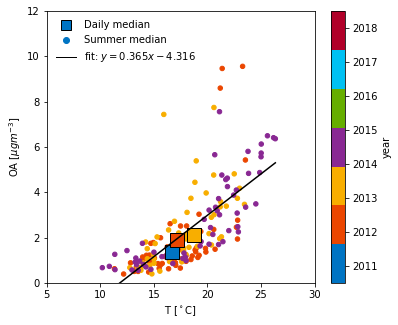

In [34]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca]
#def plot(v_x, 
fig, ax = plt.subplots(figsize=[6,5])
#for y,co in zip(df_s['year'].unique(), cols):
    
#    _df = df_s[df_s['year']==y]
df_s.plot.scatter(x=v_x,y=v_y, ax=ax, c = 'year',cmap = my_cmap, vmax=2018.5, vmin=2010.5)#, label=y )#, c='year', cmap='Paired')
for y,co in zip(df_s['year'].unique(), cols):
    df_s = dic_df_sm[ca]

    _dfm = df_s[df_s['year']==y]
    
    #_dfm = _df.median()
    ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')

df_s = dic_df[ca]#[years>2011]
x = np.array(df_s[v_x].values).reshape(-1,1)
y=np.array(df_s[v_y].values).reshape(-1,1)

model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)
x_s = np.linspace(x.min(),x.max(),10)
a = model.coef_[0]
b = model.intercept_[0]
lab = r'fit: $y= %.3fx %.3f$' %(a,b)
ax.plot(x_s, (a*x_s + b), c='k')
plt.legend(frameon=False, bbox_to_anchor=(1,1,))
#ax.hlines(2000, 5,30, color='k', linewidth=1)

ax.set_ylim([0,12])
ax.set_xlim([5,30])
ax.set_xlabel(r'T [$^\circ$C]')
ax.set_ylabel(r'OA [$\mu g m^{-3}$]')


from matplotlib.lines import Line2D
from matplotlib.patches import Patch

custom_lines = [
    Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
    Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
    Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')
plt.show()

In [35]:
col_dic

{2012: '#0074c3',
 2013: '#eb4600',
 2014: '#f8ae00',
 2015: '#892893',
 2016: '#66ae00',
 2017: '#00c1f3',
 2018: '#b00029'}

In [36]:
df_s['year'].unique()

array([2012, 2013, 2014])

In [37]:
def plot_scatter(v_x,v_y, df_s, df_sy,ca, 
                 xlims=None, 
                 ylims=None,
                 xlab = None,
                 ylab = None,
                 figsize=[6,5],
                 ax = None,
                 #fig = None
                ):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.get_figure()
    #for y,co in zip(df_s['year'].unique(), cols):
    
    #    _df = df_s[df_s['year']==y]
    _cols = [col_dic[int(y)] for y in df_s['year'].unique()]
    _my_cmap = ListedColormap(_cols)
    df_s.plot.scatter(x=v_x,y=v_y, ax=ax, 
                      c = 'year',
                      cmap = my_cmap, 
                      vmax=2018.5, vmin=2011.5)#, label=y )#, c='year', cmap='Paired')
    #df_sy = df_s.resample('Y').median()
    if df_sy is not None:
        for y,co in zip(df_sy['year'].unique(), cols):
            #df_sy = dic_df_sm[ca]
            co = col_dic[int(y)]
            _dfm = df_sy[df_sy['year']==y]
            
            #_dfm = _df.median()
            ax.scatter(_dfm[v_x],_dfm[v_y],c=co, label='__nolegend__' , marker='s', s=200, edgecolor='k')
    
    _df_s = df_s[df_s[v_x].notnull() & df_s[v_y].notnull()]
    x = np.array(_df_s[v_x].values).reshape(-1,1)
    y=np.array(_df_s[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    if b<0:
        sig = ''
    else:
        sig='+'
    if a<1:
        
        lab = r'fit: $y= %.3fx%s%.3f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>10:
        lab = r'fit: $y= %.1fx%s%.1f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    elif a>100:
        lab = r'fit: $y= %.0fx%s%.0f$, r$^2$=%.02f' %(a,sig,b, r_sq)
    else:
        lab = r'fit: $y= %.2fx%s%.2f$, r$^2$=%.02f' %(a,sig,b, r_sq)
        
        
    ax.plot(x_s, (a*x_s + b), c='k')
    plt.legend(frameon=False, bbox_to_anchor=(1,1,))
    #ax.hlines(2000, 5,30, color='k', linewidth=1)

    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)


    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    custom_lines = [
        Line2D([0], [0],  color='#0074c3',marker='s',markeredgecolor='k',markersize=10, linewidth=0),
        Line2D([0], [0], color='#0074c3',marker='o', linewidth=0),
        Line2D([0], [0], color='k', lw=1),
                #Patch( color='b', lw=4),
               # Line2D([0], [0], color=cmap(1.), lw=4)
               ]

    ax.legend(custom_lines, ['Daily median', 'Summer median',lab,],frameon=False,
          loc='upper left')
    return fig, ax

In [38]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

## T vs N100

No handles with labels found to put in legend.


coefficient of determination: 0.5651607988008802
intercept: [-2825.8704]
slope: [[246.57877]]


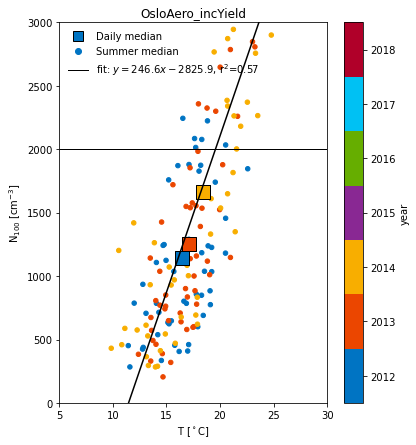

In [39]:
v_x = 'T_C'
v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,3000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

No handles with labels found to put in legend.


coefficient of determination: 0.5225424556311591
intercept: [-1176.73]
slope: [[99.485245]]
Plots/scat_OsloAero_intBVOC_f19_f19_T_C_N100.png


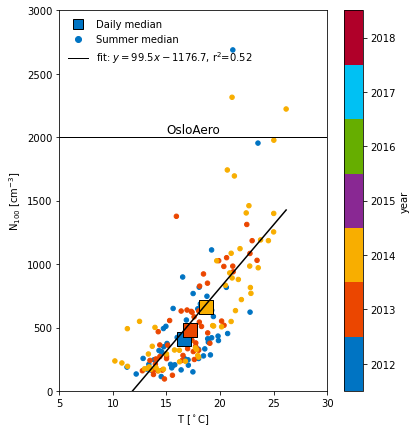

In [40]:
v_x = 'T_C'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,3000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAero', size=12)

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)
plt.show()

No handles with labels found to put in legend.


coefficient of determination: 0.5050392803771455
intercept: [-530.23737013]
slope: [[68.31557758]]
Plots/scat_OBS_T _N100 .png


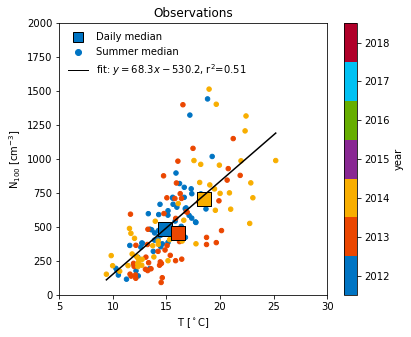

In [41]:

v_x = 'T (degree C)'
v_y = 'N100 (cm^-3)'
ca ='OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,2000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)
plt.show()

## T vs N50

No handles with labels found to put in legend.


coefficient of determination: 0.6839339121581274
intercept: [-2265.696]
slope: [[332.03027]]


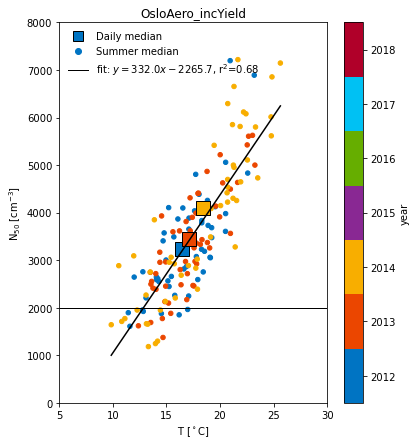

In [42]:
v_x = 'T_C'
v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,8000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5651607988008802
intercept: [-2825.8704]
slope: [[246.57877]]
coefficient of determination: 0.5225424556311591
intercept: [-1176.73]
slope: [[99.485245]]
coefficient of determination: 0.47792429181843366
intercept: [-608.55471592]
slope: [[84.1307772]]


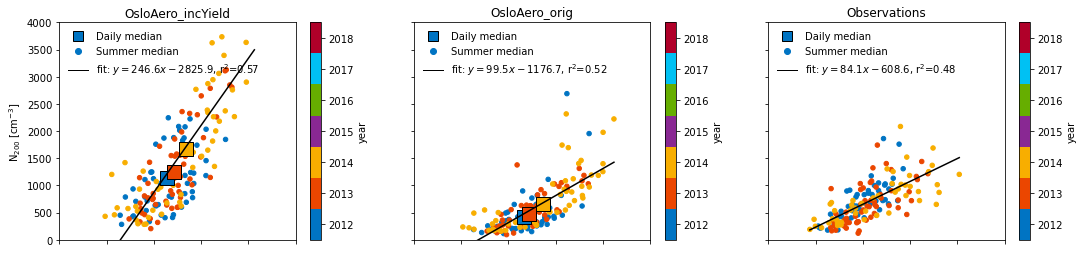

In [47]:
fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True, sharex=True)
v_x = 'T_C'
v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,4000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'T (degree C)'
ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()


In [83]:
df_joint_hyy

,N50,N80,N100,N150,N200,N250,N300,JA,season,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
time,,,,,,,,,,,,,,,
2012-07-01,1539.884775,1127.747640,1007.034965,578.073191,284.208042,125.128946,50.138568,True,JJA,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,1804.149067,1030.546094,857.929746,381.541914,174.273228,70.504154,22.006268,True,JJA,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,1959.923364,1215.817531,1027.748168,360.088447,176.075955,94.625206,37.235395,True,JJA,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,1949.793822,1143.721778,1024.114615,406.017417,155.677722,60.318549,20.348557,True,JJA,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,1956.386055,1402.749411,1307.415981,662.901280,249.231780,84.693753,26.668016,True,JJA,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-27,1405.298421,709.514097,564.525268,187.964314,70.974617,28.109038,11.559803,True,JJA,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2239.364654,1217.229603,1023.280318,379.815562,150.614142,56.831057,20.704524,True,JJA,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,1778.357242,1164.006277,1004.636762,410.481762,152.676065,52.183084,18.504379,True,JJA,2018,8,29,15.028000,2.148551,720.768715


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.35413035714910723
intercept: [-241.177]
slope: [[19.792927]]
coefficient of determination: 0.2488826152066459
intercept: [-67.93106]
slope: [[6.914843]]
coefficient of determination: 0.44523163929400333
intercept: [-245.53994181]
slope: [[29.14064356]]


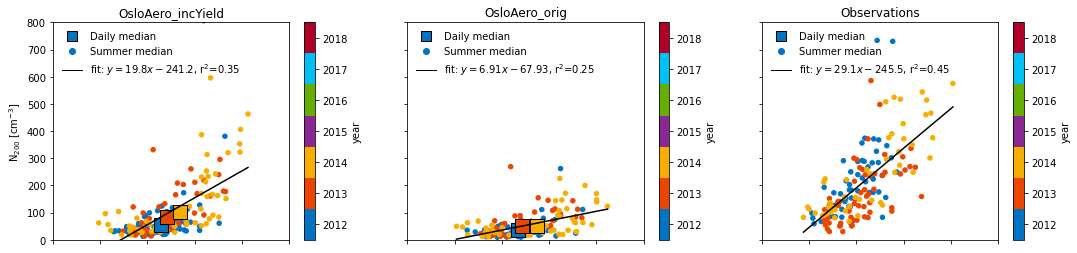

In [51]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True, sharex=True)
v_x = 'T_C'
v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,800]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'T (degree C)'
ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.44199369793514687
intercept: [-955.46234]
slope: [[75.912926]]
coefficient of determination: 0.3755006724493575
intercept: [-271.64594]
slope: [[23.711256]]
coefficient of determination: 0.4887325116056471
intercept: [-430.25440021]
slope: [[52.0645842]]


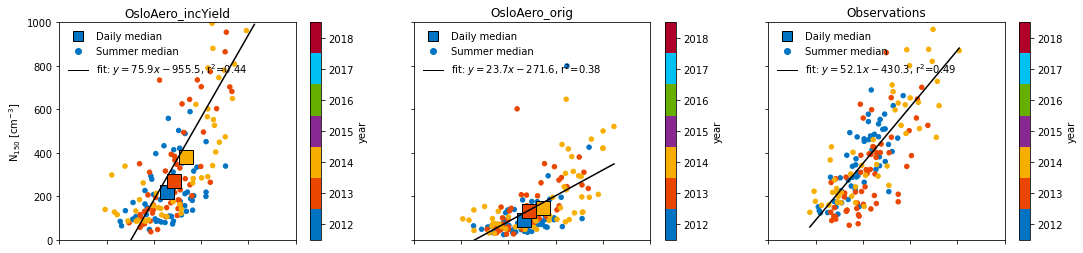

In [49]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True, sharex=True)
v_x = 'T_C'
v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,1000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'T (degree C)'
ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6839339121581274
intercept: [-2265.696]
slope: [[332.03027]]
coefficient of determination: 0.6380766728370348
intercept: [-1930.2119]
slope: [[221.40747]]
coefficient of determination: 0.1952169986448774
intercept: [145.27769336]
slope: [[78.15991789]]


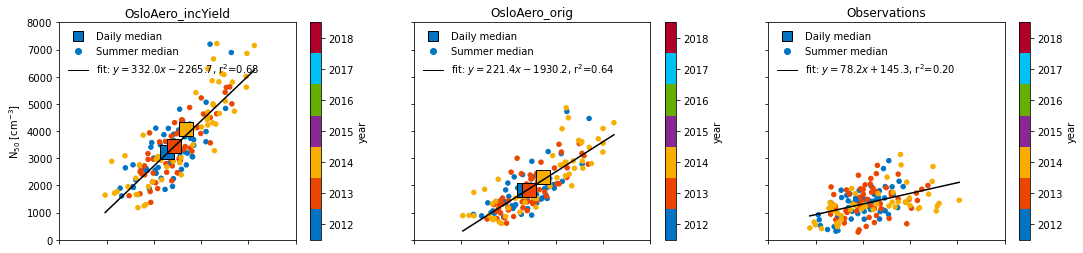

In [50]:

fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True, sharex=True)
v_x = 'T_C'
v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,8000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incYield')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,8000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'T (degree C)'
v_y = 'N50'
ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.


coefficient of determination: 0.6380766728370348
intercept: [-1930.2119]
slope: [[221.40747]]
Plots/scat_OsloAero_intBVOC_f19_f19_T_C_N50.png


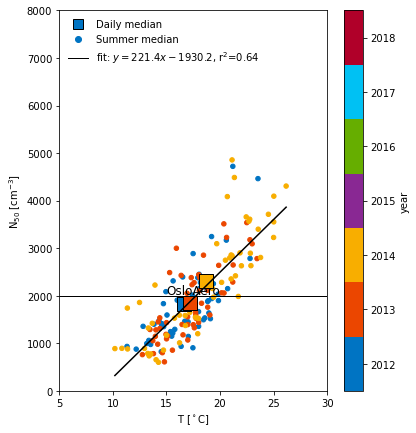

In [46]:
v_x = 'T_C'
v_y = 'N50'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,8000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAero', size=12)

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

In [ ]:
v_x = 'T_C'
v_y = 'N50'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,8000]
xlab = r'T [$^\circ$C]'
ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.text(15,2030, 'OsloAero', size=12)

fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)
print(fn)

## OA vs N50

coefficient of determination: 0.8494863807525551
intercept: [2155.3828]
slope: [[304.24216]]


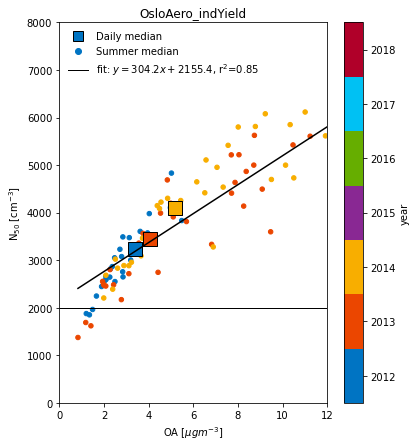

In [113]:
v_x = 'OA'
v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,8000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{50}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAero_indYield')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.783682533997341
intercept: [1025.7047]
slope: [[490.5825]]


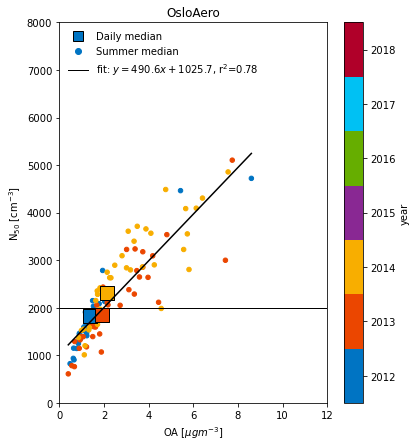

In [114]:
v_x = 'OA'
v_y = 'N50'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,8000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{50}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## OA vs N200

coefficient of determination: 0.9333545789612973
intercept: [-44.86618]
slope: [[30.588308]]


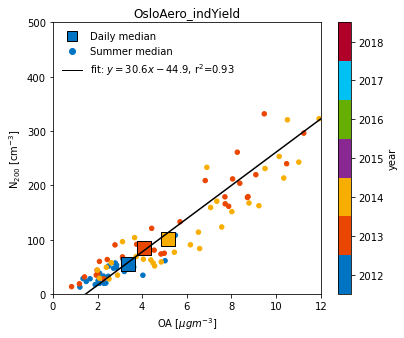

In [165]:
v_x = 'OA'
v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,500]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{200}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAero_indYield')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.8778216943983719
intercept: [-6.909996]
slope: [[29.313486]]


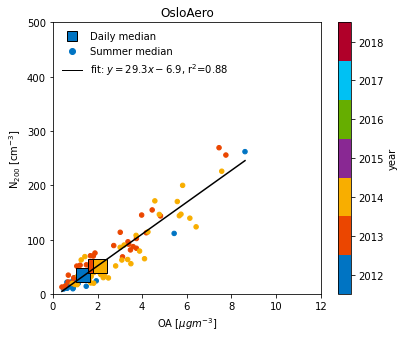

In [166]:
v_x = 'OA'
v_y = 'N200'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,500]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{200}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## OA vs N150

coefficient of determination: 0.9797637684936713
intercept: [-141.8334]
slope: [[105.3029]]


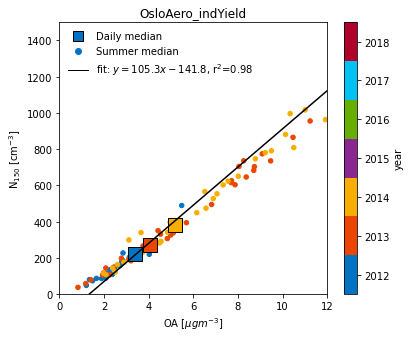

In [168]:
v_x = 'OA'
v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,1500]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{150}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAero_indYield')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.9704681777605356
intercept: [-29.962677]
slope: [[85.55527]]


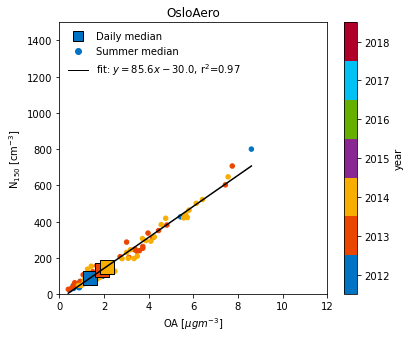

In [169]:
v_x = 'OA'
v_y = 'N150'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,1500]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{150}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.3306908784652701
intercept: [1460.2571]
slope: [[244.24086]]


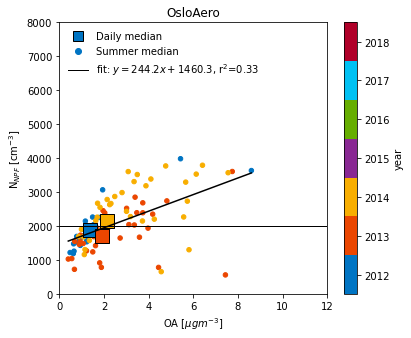

In [172]:
v_x = 'OA'
v_y = 'NCONC01'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,8000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{NPF}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [174]:
cases_inc_Y

['OsloAero_intBVOC_f19_f19_mg17_incY_full']

coefficient of determination: 0.6245084181124394
intercept: [2329.9165]
slope: [[211.15361]]


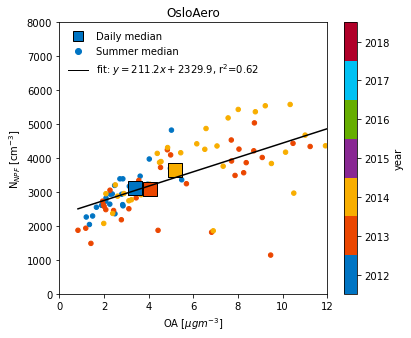

In [173]:
v_x = 'OA'
v_y = 'NCONC01'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,8000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{NPF}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       #figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero_inc')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## OA vs N100

coefficient of determination: 0.7329804982825727
intercept: [160.16024689]
slope: [[139.8336719]]


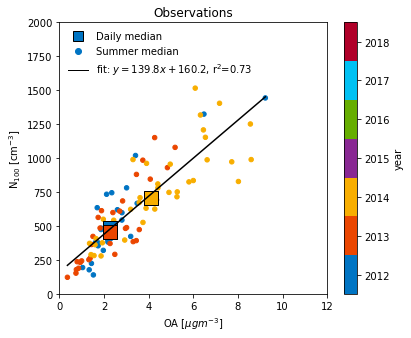

In [115]:

v_x = 'OA (microgram m^-3)'
v_y = 'N100 (cm^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [0,12]
ylims = [0,2000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.9474865817314967
intercept: [136.09338]
slope: [[282.59912]]


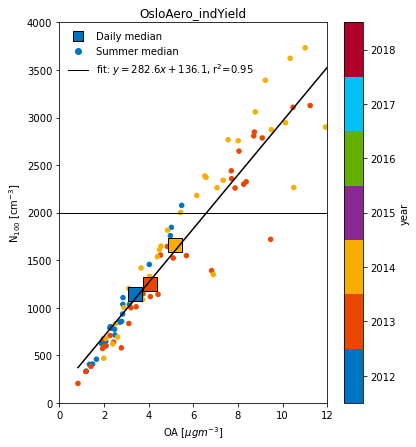

In [136]:
v_x = 'OA'
v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,4000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)
ax.set_title('OsloAero_indYield')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.9141617538665362
intercept: [1.6020508]
slope: [[285.87662]]


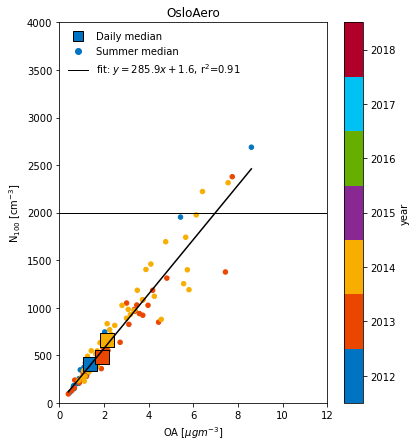

In [137]:
v_x = 'OA'
v_y = 'N100'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]
ylims = [0,4000]
xlab = r'OA [$\mu g m^{-3}$]'
ylab = r'N$_{100}$ [cm$^{-3}$]'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims, 
                       figsize=[6,7],
                       ylims=ylims, xlab=xlab, ylab = ylab)
ax.hlines(2000, 0,30, color='k', linewidth=1)
#ax.text(15,2010, 'OsloAero', size=12)

ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## T vs OA

coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


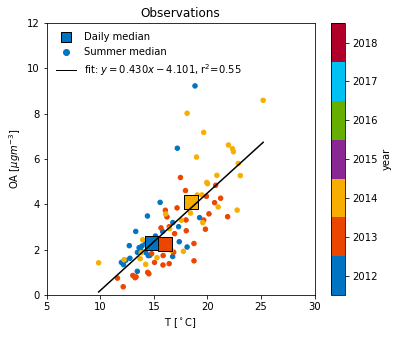

In [118]:
v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.41920273454752377
intercept: [-4.4137573]
slope: [[0.3642034]]


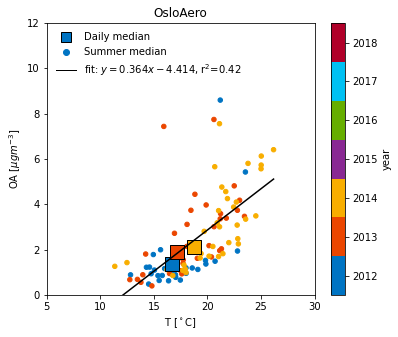

In [120]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.4706370598334235
intercept: [-11.212549]
slope: [[0.9142466]]


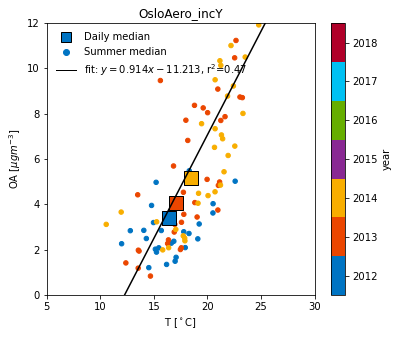

In [121]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero_incY')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.4622542625263213
intercept: [-10.571573]
slope: [[0.84104306]]


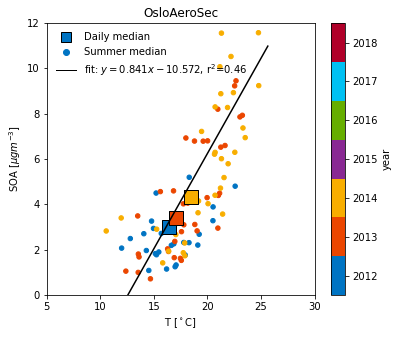

In [122]:
v_x = 'T_C'
v_y = 'SOA'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'SOA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.015255507321907502
intercept: [0.31051722]
slope: [[0.02041558]]


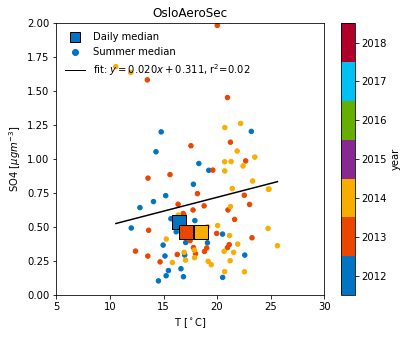

In [123]:
v_x = 'T_C'
v_y = 'SO4'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,2]
xlab = r'T [$^\circ$C]'
ylab = r'SO4 [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

## POA:

coefficient of determination: 0.09026848725270487
intercept: [-0.5675906]
slope: [[0.0692837]]


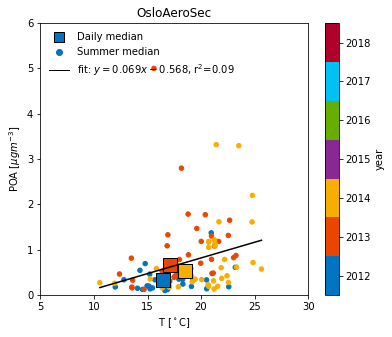

In [124]:
v_x = 'T_C'
v_y = 'POA'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,6]
xlab = r'T [$^\circ$C]'
ylab = r'POA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAeroSec')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.41920273454752377
intercept: [-4.4137573]
slope: [[0.3642034]]


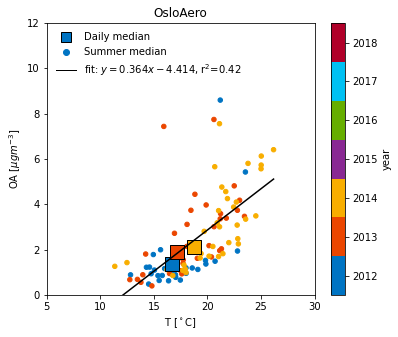

In [125]:
v_x = 'T_C'
v_y = 'OA'
ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_OA].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('OsloAero')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


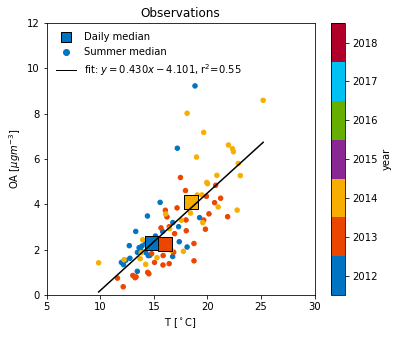

In [126]:
v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = 'OBS'
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.loc['2012':'2014']
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

ax.set_title('Observations')
fn = make_fn_scat(ca, v_x, v_y)#plot_path /f'scat_{ca}_{v_x}_{v_y}.png'
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [127]:
df_hyy_1y

,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
date,,,,
2012,2012,14.819834,2.286611,485.015920
2013,2013,16.061833,2.266324,458.851509
2014,2014,18.469334,4.102861,706.239261
2015,2015,14.949500,2.167607,499.026618
2016,2016,13.959500,1.693031,418.417730
2017,2017,13.619333,1.845648,409.297699
2018,2018,17.848833,3.366803,770.183131


## All data: 

coefficient of determination: 0.63075713228574
intercept: [-3.92871075]
slope: [[0.42275072]]


(<Figure size 432x360 with 2 Axes>,
 <AxesSubplot:xlabel='T [$^\\circ$C]', ylabel='OA [$\\mu g m^{-3}$]'>)

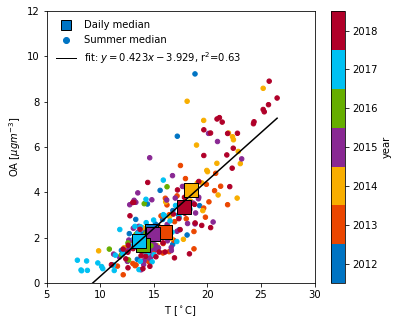

In [128]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1

df_sy = df_hyy_1y#df_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

## Only to 2014

No handles with labels found to put in legend.


coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


(<Figure size 432x360 with 2 Axes>,
 <AxesSubplot:xlabel='T [$^\\circ$C]', ylabel='OA [$\\mu g m^{-3}$]'>)

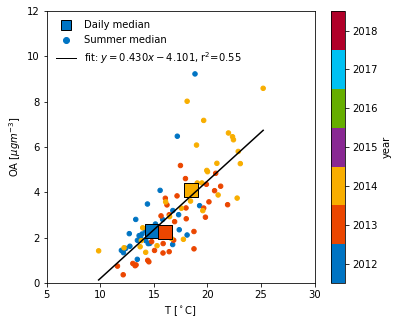

In [55]:

v_x = 'T (degree C)'
v_y = 'OA (microgram m^-3)'
ca = cases_orig[0]
df_s = df_hyy_1.loc['2012':'2014']

df_sy = df_hyy_1y.iloc[0:3] #f_hyy_1.resample('Y').median()
xlims = [5,30]
ylims = [0,12]
xlab = r'T [$^\circ$C]'
ylab = r'OA [$\mu g m^{-3}$]'
plot_scatter(v_x,v_y, df_s, df_sy, ca, xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)

In [58]:

df_1 = dic_df[cases_inc_Y[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c) | ('lon_' in c))], axis=1)
df_2 = dic_df[cases_orig[0]].drop([c for c in dic_df[ca].columns if (('lat_' in c)|('lon_' in c))], axis=1)
df_1.head()

df_mod_dic = dict(OsloAeroSec=df_1, OsloAero = df_2)

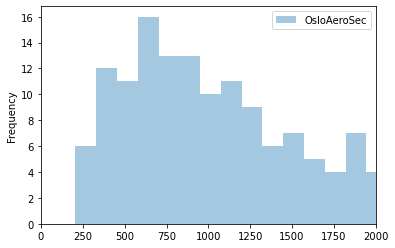

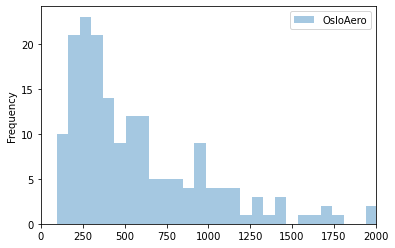

(0.0, 2000.0)

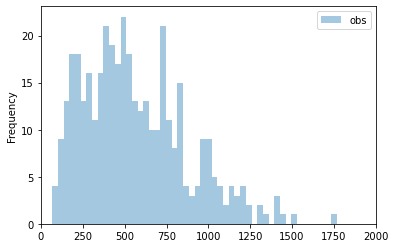

In [59]:

df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()
plt.xlim([0,2000])
plt.show()
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')
plt.legend()
plt.xlim([0,2000])

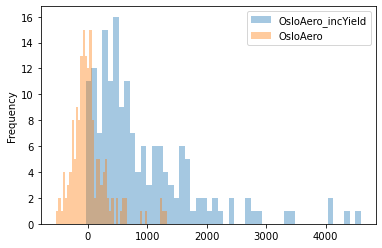

In [67]:
#df_1['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAeroSec')
#df_2['N100'].plot.hist(bins=50, alpha=0.4, label='OsloAero')

(-df_hyy_1['N100 (cm^-3)']+df_1['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAero_incYield')
(-df_hyy_1['N100 (cm^-3)']+df_2['N100']).plot.hist(bins=50, alpha=0.4, label='OsloAero')
plt.legend()

In [68]:
dic_vars =dict(
    N100='N100 (cm^-3)',
    OA = 'OA (microgram m^-3)',
    T_C = 'T (degree C)',
)

In [69]:

def get_common_df(v):
    ls =list()
    for m in df_mod_dic.keys():
        _df = df_mod_dic[m]
        ls.append(_df[v].rename(m))
    ls.append(df_hyy_1[dic_vars[v]].rename('Obs'))
    df_o = pd.concat(ls,axis=1)
    df_o['year'] = df_o.index.year
    return df_o

In [70]:
df_100 = get_common_df('N100')

df_100 = df_100.loc['2012-01-01':'2014-01-01']

In [71]:
def add_reg(v_x, v_y, df_s, ax):
    _df = df_s[~df_s.isnull().any(axis=1)]
    x = np.array(_df[v_x].values).reshape(-1,1)
    y=np.array(_df[v_y].values).reshape(-1,1)

    model = LinearRegression().fit(x,y)

    r_sq = model.score(x, y)
    print('coefficient of determination:', r_sq)

    print('intercept:', model.intercept_)

    print('slope:', model.coef_)
    x_s = np.linspace(x.min(),x.max(),10)
    a = model.coef_[0]
    b = model.intercept_[0]
    lab = r'fit: $y= %.3fx+ %.3f$, r2=%.2f' %(a,b,r_sq)
    li = ax.plot(x_s, (a*x_s + b), c='k')
    return lab, li

In [72]:
df_100[~df_100.isnull().any(axis=1)]

,OsloAeroSec,OsloAero,Obs,year
date,,,,
2012-07-01,1035.559005,397.564200,781.245471,2012
2012-07-02,601.219801,255.971882,635.103339,2012
2012-07-03,775.336610,284.331693,745.212064,2012
2012-07-04,1456.537044,453.022353,734.009356,2012
2012-07-05,1846.531403,621.675047,1019.238450,2012
...,...,...,...,...
2013-08-27,1577.434900,584.419822,824.098344,2013
2013-08-28,1539.348582,620.626784,876.822552,2013
2013-08-29,771.182182,271.475618,138.857474,2013


coefficient of determination: 0.4820590817991449
intercept: [228.60990513]
slope: [[0.22235261]]


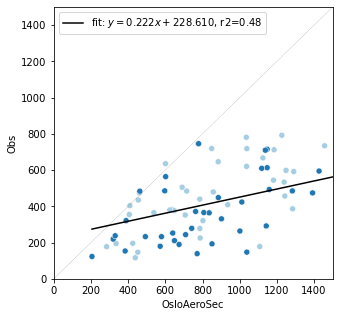

In [75]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAeroSec'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

coefficient of determination: 0.4833403986947623
intercept: [255.14478949]
slope: [[0.50925453]]


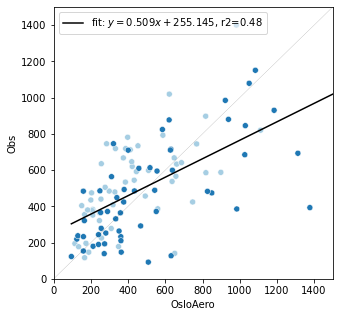

In [76]:
f, ax = plt.subplots(figsize=[5,5])
_df = df_100
v_x  = 'OsloAero'
v_y = 'Obs'
sns.scatterplot(x=v_x,y=v_y, hue='year',data=_df, 
    
                palette='Paired')
ax.legend(loc=1)
lab,li = add_reg(v_x, v_y, _df, ax)
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.1)
ax.legend(li, [lab,])

In [77]:
df_OA = get_common_df('OA')

df_OA = df_OA.loc['2012-01-01':'2014-01-01']

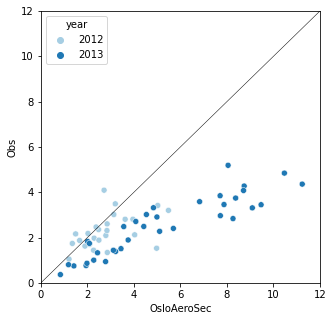

In [78]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)

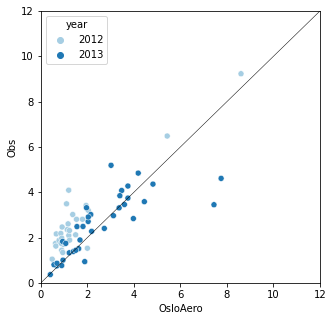

In [79]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_OA, 
                palette='Paired')

ax.set_xlim([0,12])
ax.set_ylim([0,12])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)

In [80]:
df_TC = get_common_df('T_C')

df_TC = df_TC.loc['2012-01-01':'2014-01-01']

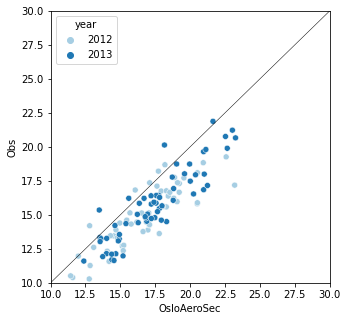

In [81]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAeroSec',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)

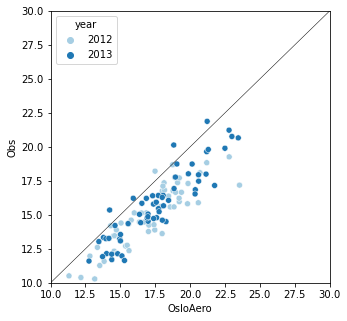

In [82]:
f, ax = plt.subplots(figsize=[5,5])
sns.scatterplot(x='OsloAero',y='Obs', hue='year',data=df_TC, 
                palette='Paired')

ax.set_xlim([10,30])
ax.set_ylim([10,30])

lims = ax.get_xlim()
ax.plot(lims,lims, c='k', linewidth=0.5)